# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
import numpy as np
import scipy.stats as stats


In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [235]:
# option 1
from scipy.stats import ttest_1samp
from statsmodels.stats.power import ttest_power
s1=GPU1
t_stat,p_value=ttest_1samp(s1,0)
print('T_stat:%5.4f\nP_Value :%6.5e'%(t_stat,p_value))
print("Since P values is significantly < 0.05, There is enough statistical edivence to reject Null hypotesis at 5% level \
of significance.Mean value of GPU1 is not equal to zero")


T_stat:34.0562
P_Value :7.22889e-15
Since P values is significantly < 0.05, There is enough statistical edivence to reject Null hypotesis at 5% level of significance.Mean value of GPU1 is not equal to zero


In [242]:
#Alternate method
s1=GPU1
s2=GPU2
mu=0
print('Population Mean : %5.3f'%mu)
xbar=np.mean(s1)
print('Sample Mean :%5.3f'%xbar)
SE=np.std(s1,ddof=1)/np.sqrt(len(s1))
print('S_Error :%5.3f'%SE)
print('T_Stats :%5.3f'%((xbar-mu)/SE))

print('The critical values are : ')
print(stats.t.isf(.975,loc=mu,scale=SE,df=len(s1)-1))
print(stats.t.isf(.025,loc=mu,scale=SE,df=len(s1)-1))

print('P value %6.5e'%(stats.t.sf(abs(xbar),loc=mu,scale=SE,df=len(s1)-1)*2))
print("Since P values is significantly < 0.05, There is enough statistical edivence to reject Null hypotesis at 5% level \
of significance.Mean value of GPU1 is not equal to zero")

Population Mean : 0.000
Sample Mean :10.333
S_Error :0.303
T_Stats :34.056
The critical values are : 
-0.6507704546500326
0.6507704546500327
P value 7.22889e-15
Since P values is significantly < 0.05, There is enough statistical edivence to reject Null hypotesis at 5% level of significance.Mean value of GPU1 is not equal to zero


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [250]:
t_stat,p_value=stats.ttest_ind(s1,s2,equal_var='True')
print('Sample Mean S1 :%5.3f\nSample Mean S2:%5.3f'%(np.mean(s1),np.mean(s2)))
print('T_stat value :%10.5f\np_value : %5.4f'%(t_stat,p_value))
print('Statistically significanct evidence is available to reject null hypothesis at 5% level of significance\n\
There is a significant difference between GPU1 and GPU2')

Sample Mean S1 :10.333
Sample Mean S2:11.467
T_stat value :  -2.62763
p_value : 0.0138
Statistically significanct evidence is available to reject null hypothesis at 5% level of significance
There is a significant difference between GPU1 and GPU2


## Question 3

He is trying a third GPU - GPU3.

In [6]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [252]:
s3=GPU3
t_stat,p_value=stats.ttest_ind(s1,s3,equal_var="True")
print('Sample Mean S1 :%5.3f\nSample Mean S3 :%5.3f'%(np.mean(s1), np.mean(s3)) )
print('T_stat value :%10.5f\np_value : %10.5f'%(t_stat,p_value))
print('Statistically significanct evidence is not available to reject null hypothesis at 5% level of significance\n\
There is a no significant difference between GPU1 and GPU3')

Sample Mean S1 :10.333
Sample Mean S3 :11.067
T_stat value :  -1.49889
p_value :    0.14509
Statistically significanct evidence is not available to reject null hypothesis at 5% level of significance
There is a no significant difference between GPU1 and GPU3


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [8]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

Test Statistics :2.674
P_value : 0.1226
Statistically significanct evidence is not available to reject null hypothesis at 5% level of significance
Hence samples selected from population having equal variance
   Result_value Exp
0       1.59544  e1
1       1.41973  e1
2       0.00000  e1
3       0.00000  e1
0       1.43380  e2
0.8733555088040227 0.6674627709994392 0.6674627709994392


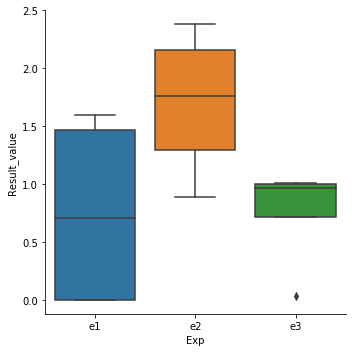

In [254]:
from scipy.stats import levene
import seaborn as sns
import pandas as pd

Test_stats,P_value=stats.levene(e1,e2,e3)
print('Test Statistics :%5.3f\nP_value : %5.4f'%(Test_stats,P_value))
print("Statistically significanct evidence is not available to reject null hypothesis at 5% level of significance\n\
Hence samples selected from population having equal variance")
#plot box plot to check
df1=pd.DataFrame({"Result_value" :e1,'Exp' : 'e1'})
df2=pd.DataFrame({"Result_value" :e2,'Exp' : 'e2'})
df3=pd.DataFrame({"Result_value" :e3,'Exp' : 'e3'})
df=df1.append(df2)
df=df.append(df3)
print(df.head())
sns.catplot(x='Exp',y='Result_value',kind="box",data=df)
print(np.std(e1,ddof=1),np.std(e2,ddof=1),np.std(e2,ddof=1))

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [86]:
F_stats,P_value=stats.f_oneway(e1,e2,e3)
print('F_stat :%5.3f\nP_value : %5.3f'%(F_stats,P_value))
print('Statistically significanct evidence is not available to reject null hypothesis at 5% level of significance.')
print('Hence we conclude that the results for all three experiments are not significantly different.')

F_stat :2.514
P_value : 0.136
Statistically significanct evidence is not available to reject null hypothesis at 5% level of significance.
Hence we conclude that the results for all three experiments are not significantly different.


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type 1 error is the possibility of rejecting null hypothesis when true.(we conclude there is an effect when there isnt one)
Type 2 error is the possibility of not rejecting null hypothesis when false.(Fail to find an effect that does exist)

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


𝐻0 : 𝜇 = 4.5
𝐻𝐴: 𝜇 != 4.5
Two tail t test

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [10]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [257]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)

print('Chi-square statistic %3.5f \nP value %1.6f\nDegrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
print('Statistically significanct evidence is available to reject null hypothesis at 10% level of significance.')
table=stats.contingency.expected_freq(dice)
print('Contigency Table\n',table)

Chi-square statistic 23.31567 
P value 0.077664
Degrees of freedom 15
Statistically significanct evidence is available to reject null hypothesis at 10% level of significance.
Contigency Table
 [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [261]:
ztable=stats.zscore(dice, axis=None, ddof=1)
print('Z_score :\n',ztable)
#print(np.mean(dice),np.std(dice,ddof=1))
#print((dice-np.mean(dice))/np.std(dice,ddof=1))
#Check the Mean and Stdev after scaling
print('Xbar:%5.4f\nSigma:%5.4f'%(np.mean(ztable),np.std(ztable,ddof=1)))
P_values=stats.norm.sf(abs(ztable),loc=0,scale=1)*2  # two sided tail
print('P_values table :\n',P_values)
stats.ttest_1samp(ztable,0,)
print('Mean of array of P_Values is %5.4f'%np.mean(P_values))


Z_score :
 [[-0.45530567  0.48132314 -1.07972488  0.48132314]
 [ 0.79353274 -0.14309607  0.48132314 -0.45530567]
 [ 0.48132314  1.73016155  0.16911354 -1.39193448]
 [-0.76751528  2.97899997  0.16911354 -1.07972488]
 [-1.07972488  0.79353274 -0.14309607 -0.45530567]
 [ 0.16911354 -1.39193448 -0.45530567  0.16911354]]
Xbar:0.0000
Sigma:1.0000
P_values table :
 [[0.64888935 0.63028685 0.28026471 0.63028685]
 [0.4274675  0.88621431 0.63028685 0.64888935]
 [0.63028685 0.08360142 0.86570734 0.16394224]
 [0.44277521 0.00289191 0.86570734 0.28026471]
 [0.28026471 0.4274675  0.88621431 0.64888935]
 [0.86570734 0.16394224 0.64888935 0.86570734]]
Mean of array of P_Values is 0.5377


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [87]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [92]:
t_Stats,P_value=stats.ttest_rel(before,after)
print('T_stats :%5.3f\nP_value :%10.9f'%(t_Stats,P_value))
print('Statistically significanct evidence is available to reject null hypothesis at 5% level of significance.')
print("We conclude that weight loss drugs has a significant effect on the weigth of the group")

T_stats :5.862
P_value :0.000000008
Statistically significanct evidence is available to reject null hypothesis at 5% level of significance.
We conclude that weight loss drugs has a significant effect on the weigth of the group
